In [5]:
#pandas and numpy
import pandas as pd
import numpy as np

#Scikit stuff
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, \
                            BaggingClassifier, BaggingRegressor, \
                            GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, \
                            classification_report, precision_score, \
                            accuracy_score, roc_curve, roc_auc_score
import scikitplot as skplt

#dmba stuff
from dmba import regressionSummary, exhaustive_search
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import classificationSummary, gainsChart, liftChart, plotDecisionTree

# visualization and tuning the aesthetics
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex = False)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10) 
plt.rc('font', size = 12) 
plt.rc('figure', figsize = (6, 5))

In [8]:
!pip install six
!pip install pydotplus
!pip install graphviz
#for plotting decision trees
import pydotplus as pplus
import graphviz
from IPython.display import Image
from six import StringIO

#for modeling with decision trees
from sklearn.tree import export_graphviz

In [9]:
# sometimes, the following is also needed to get the visualization to work
# Here, we get the path variable of the graphviz package installed in your machine.
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [10]:
#This function helps with drawing decision trees using the pydotplus and graphviz libraries
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features,\
                    class_names=classn, filled=filled)
    graph = pplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [11]:
pd.set_option("display.max_columns", None)
wv = pd.read_csv("worldvalues-data.csv", dtype='object', na_values = ['-5', '-4', '-3', '-2', '-1'])
wv.shape

(89565, 440)

In [12]:
wv = wv[["V55", "V58", "V95", "V145", "V229", "V246"]]
wv.describe()

,V55,V58,V95,V145,V229,V246
count,88117,87898,68199,84720,88038,89558
unique,10,9,10,7,8,5
top,8,No children,5,7,Full time,1
freq,16646,26142,19838,20631,28036,79300


In [13]:
wv.replace(['Missing', 'Unknown', 'Not asked', 'Not asked in suvey', 'Not applicable', 'No answer', 'Dont know'], np.nan, inplace=True)
wv.replace(['BH','HT','RU','AR','DE','PS','SE', 'SG', 'TR', 'HT: Dropped out survey; RU: Inappropriate response{Inappropriate}', 'Not asked in survey', 'DE,SE:Inapplicable ; RU:Inappropriate response; HT: Dropped out survey{Inappropriate}'], np.nan, inplace=True)
wv.replace({"V55":{"No choice at all" : 1, "A great deal of choice" : 10}}, inplace=True)
wv.replace({"V58":{"No children" : 0, "1 child" : 1, "2 children" : 2, "3 children" : 3, "4 children" : 4, "5 children" : 5, "6 children" : 6, "7 children" : 7, "8 or more children" : 8}}, inplace=True)
wv.replace({"V95":{"Left" : 1, "Right" : 10}}, inplace=True)
wv.replace({"V145":{"More than once a week" : 1, "Once a week" : 2, "Once a month" : 3, "Only on special holy days" : 4, "Once a year" : 5, "Less often" : 6, "Never, practically never" : 7}}, inplace=True)
wv.replace({"V229":{"Full time" : 1, "Part time" : 2, "Self employed" : 3, "Retired" : 4, "Housewife" : 5, "Students" : 6, "Unemployed" : 7, "Other" : 8}}, inplace=True)
wv[15:25]

,V55,V58,V95,V145,V229,V246
15,7,1,5,2,1,1
16,7,1,5,2,1,1
17,7,2,5,2,5,1
18,7,0,7,2,1,1
19,7,3,6,2,5,1
20,5,0,NaN,7,6,1
21,1,0,NaN,7,7,1
22,5,0,NaN,7,6,1
23,1,0,NaN,7,7,1
24,5,0,NaN,7,1,1


In [14]:
wv = wv.apply(pd.to_numeric)
wv.dropna(inplace=True)
wv.shape

(60981, 6)

In [15]:
wv.isna().sum()

V55     0
V58     0
V95     0
V145    0
V229    0
V246    0
dtype: int64

In [16]:
wv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60981 entries, 0 to 89564
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V55     60981 non-null  float64
 1   V58     60981 non-null  float64
 2   V95     60981 non-null  float64
 3   V145    60981 non-null  float64
 4   V229    60981 non-null  float64
 5   V246    60981 non-null  float64
dtypes: float64(6)
memory usage: 3.3 MB


In [17]:
wv = wv.rename(columns = {"V55" : "Freedom/Control", "V58" : "Number of Children", "V95" : "Political Scale", "V145" : "Religious Attendance", "V229" : "Employment status", "V246" : "Citizenship"})
wv.head()

,Freedom/Control,Number of Children,Political Scale,Religious Attendance,Employment status,Citizenship
0,7.0,0.0,5.0,3.0,6.0,1.0
1,6.0,0.0,5.0,2.0,6.0,1.0
2,6.0,0.0,6.0,2.0,3.0,1.0
3,6.0,0.0,6.0,2.0,1.0,1.0
4,6.0,3.0,5.0,1.0,3.0,1.0


In [19]:
# First, define the X (predictor/independent) and the Y (predicted/dependent) variables:
# SciKit doesn't work with Pandas dataframes, so we just need the matrix of values.
X = wv[['Number of Children', 'Political Scale', 'Religious Attendance', 'Employment status', 'Citizenship']].values
Y = wv['Freedom/Control']

In [20]:
# Second, split the data into training and test portions:
# I am using 25% of data for testing and 75% for training.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=7)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(45735, 5) (45735,)
(15246, 5) (15246,)


In [21]:
# Third, select the modeling approach for fitting: Decision Tree regression
DTsalesreg=DecisionTreeRegressor(random_state=23)

In [22]:
# Fit the model on training data
# Since we are using the training portion of the data, we are now "training" our model.
DTsalesreg.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=23, splitter='best')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0942938 to fit



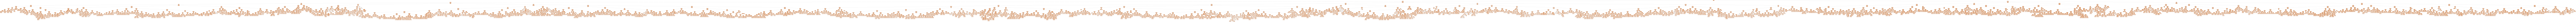

In [23]:
DTRgraph = print_tree(DTsalesreg, features=['Number of Children', 'Political Scale', 'Religious Attendance', 'Employment status', 'Citizenship'])
Image(DTRgraph.create_png())

In [24]:
# Fourth, get the predicted values and evaluate the training:
DT_predictions_tr=DTsalesreg.predict(X_train) # predictions for training set

In [25]:
# How good is this prediction in training?
np.sqrt(np.square(DT_predictions_tr-Y_train).mean()) #RMSE calculation

2.063505765996098

In [26]:
regressionSummary(Y_train, DT_predictions_tr)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 2.0635
            Mean Absolute Error (MAE) : 1.6155
          Mean Percentage Error (MPE) : -21.4723
Mean Absolute Percentage Error (MAPE) : 39.0917


In [27]:
# How good is the model if subjected to variations in the training sample?
cvparam = KFold(3, random_state=13)
scores_mse_DT =  cross_validate(DTsalesreg, X_train, Y_train, \
                                cv=cvparam, scoring='neg_mean_squared_error')

/Users/shaneregel/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [28]:
scores_mse_DT['test_score']

array([-5.51514597, -5.43321413, -5.49025814])

In [29]:
np.sqrt(scores_mse_DT['test_score'].mean()*-1)

2.3408416036605577

In [30]:
# Fifth, how good is the out-of-training-sample (i.e., the test) prediction of the trained model?
DT_predictions_tt=DTsalesreg.predict(X_test)
regressionSummary(Y_test, DT_predictions_tt)
#np.sqrt(np.square(DT_predictions_tt-Y_test).mean())


Regression statistics

                      Mean Error (ME) : -0.0473
       Root Mean Squared Error (RMSE) : 2.3376
            Mean Absolute Error (MAE) : 1.8350
          Mean Percentage Error (MPE) : -26.0982
Mean Absolute Percentage Error (MAPE) : 45.7033


Try retraining the model with less branches

In [38]:
# Decide the parameters for the new Decision Tree: we limit the decision depth to 3.
DTsalesreg2=DecisionTreeRegressor(max_depth=5, random_state=23)

In [39]:
# Fit the model on training data
# Since we are using the training portion of the data, we are now "training" our model.
DTsalesreg2.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=23, splitter='best')

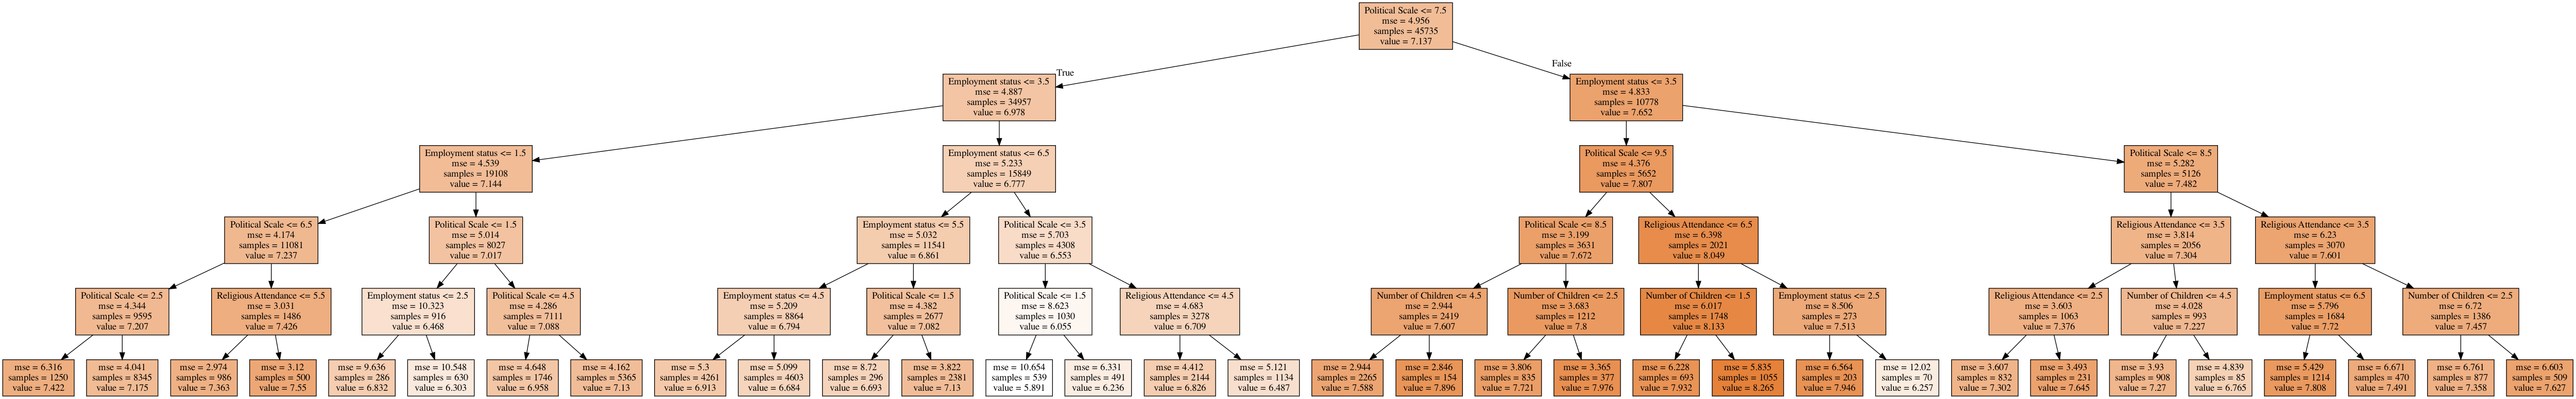

In [40]:
DTRgraph = print_tree(DTsalesreg2, features=['Number of Children', 'Political Scale', 'Religious Attendance', 'Employment status', 'Citizenship'])
Image(DTRgraph.create_png())

In [41]:
# Now, get the predicted values and evaluate the training of the new decision tree:
DT2_predictions_tr=DTsalesreg2.predict(X_train) # predictions for training set

In [42]:
# How good is this prediction in training?
#np.sqrt(np.square(DT2_predictions_tr-Y_train).mean()) #RMSE calculation
regressionSummary(Y_train, DT2_predictions_tr)


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 2.1873
            Mean Absolute Error (MAE) : 1.7431
          Mean Percentage Error (MPE) : -24.4118
Mean Absolute Percentage Error (MAPE) : 43.2147


In [43]:
# How good is the model if subjected to variations in the training sample?
cvparam = KFold(3, random_state=13)
scores_mse_DT2 =  cross_validate(DTsalesreg2, X_train, Y_train, \
                                 cv=cvparam, scoring='neg_mean_squared_error')

/Users/shaneregel/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [44]:
scores_mse_DT2['test_score']

array([-4.86026753, -4.74955999, -4.82855454])

In [45]:
np.sqrt(scores_mse_DT2['test_score'].mean()*-1)

2.1938081094700523

In [46]:
# Fifth, how good is the out-of-training-sample (i.e., the test) prediction of the trained model?
DT2_predictions_tt=DTsalesreg2.predict(X_test)
regressionSummary(Y_test, DT2_predictions_tt)
#np.sqrt(np.square(DT2_predictions_tt-Y_test).mean())


Regression statistics

                      Mean Error (ME) : -0.0443
       Root Mean Squared Error (RMSE) : 2.2148
            Mean Absolute Error (MAE) : 1.7603
          Mean Percentage Error (MPE) : -26.0944
Mean Absolute Percentage Error (MAPE) : 44.5856
